Scraping model: Air Jordan 1 Bred 1985
  -> Found 20 results for Air Jordan 1 Bred 1985

Scraping model: Air Jordan 1 Chicago 1985
  -> Found 20 results for Air Jordan 1 Chicago 1985

Scraping model: Air Jordan 2 OG 1986
  -> Found 20 results for Air Jordan 2 OG 1986

Scraping model: Air Jordan 3 Black Cement 1988
  -> Found 20 results for Air Jordan 3 Black Cement 1988

Scraping model: Air Jordan 4 Fire Red 1989
  -> Found 20 results for Air Jordan 4 Fire Red 1989

Scraping model: Air Jordan 5 Grape 1990
  -> Found 20 results for Air Jordan 5 Grape 1990

Scraping model: Air Jordan 6 Infrared 1991
  -> Found 20 results for Air Jordan 6 Infrared 1991

Scraping model: Air Jordan 7 Olympic 1992
  -> Found 20 results for Air Jordan 7 Olympic 1992

Scraping model: Air Jordan 8 Aqua 1993
  -> Found 20 results for Air Jordan 8 Aqua 1993

Scraping model: Air Jordan 9 Space Jam 1994
  -> Found 20 results for Air Jordan 9 Space Jam 1994

Scraping model: Air Jordan 10 Steel 1994
  -> Found 20 res

/var/folders/ns/nvqb8ykn4ln87vn4mwkshr2w0000gn/T/ipykernel_17966/4210681360.py:213: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


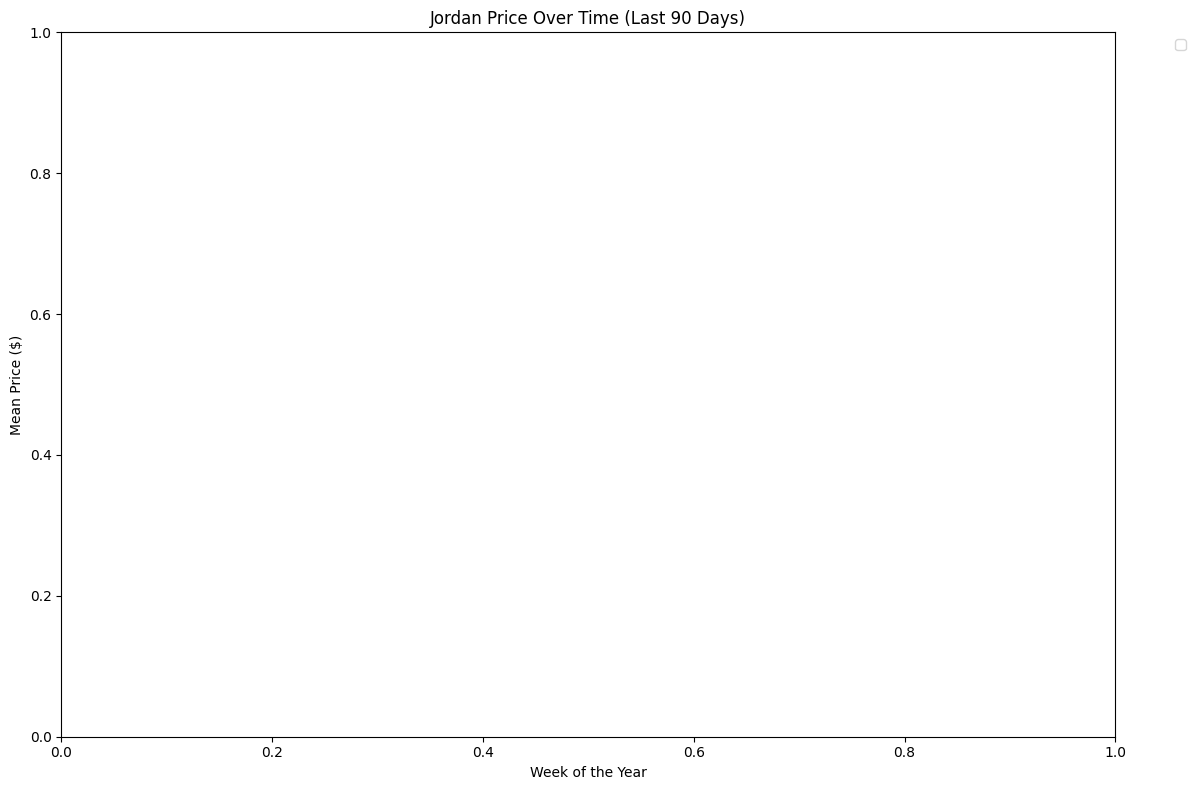

In [1]:
import time
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

#############################################
# 1. Improved Sell Date Extraction Function
#############################################
def extract_sell_date(item):
    """
    Attempts to extract the sell date from an eBay listing element.
    First, it looks for an element with class '.s-item__endedDate'.
    If not found, it scans all text nodes for any occurrence of "Ended:".
    Returns the extracted date string (with "Ended:" removed) or None.
    """
    # Try the known selector first
    ended_el = item.select_one(".s-item__endedDate")
    if ended_el:
        text = ended_el.get_text(strip=True)
        if "Ended:" in text:
            return text.replace("Ended:", "").strip()
        return text.strip()
    # Fallback: scan all text nodes in the listing for "Ended:"
    for s in item.stripped_strings:
        if "Ended:" in s:
            return s.replace("Ended:", "").strip()
    return None

#############################################
# 2. Scrape Function for One Query (One Jordan Model)
#############################################
def scrape_jordan_listings_selenium(query, pages_to_try=5, needed=20, headless=True):
    """
    Scrapes eBay completed/sold listings for a given query until at least `needed`
    results are collected or `pages_to_try` pages have been attempted.
    
    Returns a list of dicts with keys: model, title, price, link, authenticity, sell_date.
    """
    base_url = (
        "https://www.ebay.com/sch/i.html?_nkw={query}&LH_Complete=1&LH_Sold=1&_pgn={page}"
    )
    results = []
    
    # Configure Selenium
    options = Options()
    if headless:
        options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    
    CHROMEDRIVER_PATH = "/Users/ayushmajumdar/drivers/chromedriver"  # adjust as needed
    service = Service(CHROMEDRIVER_PATH)
    driver = webdriver.Chrome(service=service, options=options)
    
    try:
        page_num = 1
        while page_num <= pages_to_try and len(results) < needed:
            full_url = base_url.format(query=query.replace(" ", "+"), page=page_num)
            driver.get(full_url)
            time.sleep(random.uniform(4, 7))  # allow the page to load
            
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            items = soup.select("li.s-item")
            
            for item in items:
                # Extract title
                title_el = item.select_one(".s-item__title")
                title_text = title_el.get_text(strip=True) if title_el else ""
                if "Shop on eBay" in title_text:
                    continue
                
                # Block unwanted items
                title_lower = title_text.lower()
                BLOCKLIST_WORDS = ["keychain", "toy", "mini", "cleat", "mcs", "block", "lego", "custom"]
                if any(word in title_lower for word in BLOCKLIST_WORDS):
                    continue
                
                # Price
                price_el = item.select_one(".s-item__price")
                price_text = price_el.get_text(strip=True) if price_el else "N/A"
                
                # Link
                link_el = item.select_one("a.s-item__link")
                link_url = link_el["href"] if link_el else None
                
                # Authenticity badge (if any)
                auth_el = item.select_one(".s-item__etrs-badge, .s-item__authEnforced")
                authenticity_text = auth_el.get_text(strip=True) if auth_el else ""
                
                # Sell date extraction using our function
                sell_date = extract_sell_date(item)
                
                results.append({
                    "model": query,
                    "title": title_text,
                    "price": price_text,
                    "link": link_url,
                    "authenticity": authenticity_text,
                    "sell_date": sell_date
                })
                if len(results) >= needed:
                    break
            page_num += 1
            time.sleep(random.uniform(3, 6))
    finally:
        driver.quit()
    
    return results

#############################################
# 3. Define 30 Iconic Jordan Models
#############################################
JORDAN_MODELS_30 = [
    "Air Jordan 1 Bred 1985",
    "Air Jordan 1 Chicago 1985",
    "Air Jordan 2 OG 1986",
    "Air Jordan 3 Black Cement 1988",
    "Air Jordan 4 Fire Red 1989",
    "Air Jordan 5 Grape 1990",
    "Air Jordan 6 Infrared 1991",
    "Air Jordan 7 Olympic 1992",
    "Air Jordan 8 Aqua 1993",
    "Air Jordan 9 Space Jam 1994",
    "Air Jordan 10 Steel 1994",
    "Air Jordan 11 Concord 1995",
    "Air Jordan 12 Flu Game 1997",
    "Air Jordan 13 Bred 1998",
    "Air Jordan 14 Last Shot 1999",
    "Air Jordan 1 Retro Chicago 2013",
    "Air Jordan 3 Retro Black Cement 2011",
    "Air Jordan 4 Retro Bred 2019",
    "Air Jordan 5 Retro Raging Bull",
    "Air Jordan 6 Retro Carmine",
    "Air Jordan 11 Retro Space Jam 2009",
    "Air Jordan 11 Retro Bred 2012",
    "Air Jordan 12 Retro Playoffs 2012",
    "Air Jordan 13 He Got Game",
    "Air Jordan 1 Lost and Found 2022",
    "Air Jordan 3 White Cement 2023",
    "Air Jordan 11 Cool Grey 2021",
    "Air Jordan 4 Retro Military Black",
    "Air Jordan 6 Travis Scott",
    "Air Jordan 5 Off White"
]

#############################################
# 4. Scrape Data for All 30 Models (20 listings per model, total ~600 listings)
#############################################
all_data = []
for model_name in JORDAN_MODELS_30:
    print(f"Scraping model: {model_name}")
    shoe_data = scrape_jordan_listings_selenium(
        query=model_name,
        pages_to_try=5,
        needed=20,
        headless=True
    )
    all_data.extend(shoe_data)
    print(f"  -> Found {len(shoe_data)} results for {model_name}\n")

df = pd.DataFrame(all_data, columns=["model", "title", "price", "link", "authenticity", "sell_date"])
print("Total scraped listings:", len(df))
print(df.head(10))

#############################################
# 5. Clean and Convert Columns for Analysis
#############################################
# Parse price into a numeric value
def parse_price(price_str):
    match = re.search(r"\$([\d.,]+)", str(price_str))
    if match:
        return float(match.group(1).replace(",", ""))
    return None

df["price_numeric"] = df["price"].apply(parse_price)

# Convert sell_date to string, strip, then to datetime
df["sell_date"] = df["sell_date"].fillna("").astype(str).str.strip()
df["sell_date"] = df["sell_date"].replace("", None)
df["sell_date"] = pd.to_datetime(df["sell_date"], errors="coerce")

# Create a 'week' column (ISO week number) from sell_date
df["week"] = df["sell_date"].dt.isocalendar().week

#############################################
# 6. Group Data by Model and Week to Compute Mean Price
#############################################
weekly_model_prices = (
    df.groupby(["model", "week"])["price_numeric"]
      .mean()
      .reset_index()
      .rename(columns={"price_numeric": "mean_price"})
)

print("\nPreview of weekly_model_prices:")
print(weekly_model_prices.head(20))

#############################################
# 7. Plot Each Model's Mean Price Over Weeks
#############################################
plt.figure(figsize=(12, 8))
for model_name, subdf in weekly_model_prices.groupby("model"):
    # Only plot if we have valid week numbers (non-NaN)
    if subdf["week"].notna().any():
        plt.plot(subdf["week"], subdf["mean_price"], marker="o", linestyle="-", label=model_name)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Week of the Year")
plt.ylabel("Mean Price ($)")
plt.title("Jordan Price Over Time (Last 90 Days)")
plt.tight_layout()
plt.show()


In [2]:
#tryna get teh selld ate to work
from bs4 import BeautifulSoup

# Example HTML snippet for one eBay listing.
# Replace this string with the actual HTML from one listing.
html = """
<li class="s-item">
  <div class="s-item__details">
    <span class="s-item__endedDate">Ended: Apr 10, 2023</span>
    <!-- Other content -->
  </div>
</li>
"""

# Parse the HTML
soup = BeautifulSoup(html, "html.parser")
item = soup.select_one("li.s-item")

def extract_sell_date(item):
    # Try to extract using a known class
    ended_el = item.select_one(".s-item__endedDate")
    if ended_el:
        text = ended_el.get_text(strip=True)
        if "Ended:" in text:
            return text.replace("Ended:", "").strip()
        return text.strip()
    # Fallback: scan all text strings for "Ended:"
    for s in item.stripped_strings:
        if "Ended:" in s:
            return s.replace("Ended:", "").strip()
    return None

sell_date = extract_sell_date(item)
print("Sell date extracted:", sell_date)


Sell date extracted: Apr 10, 2023


Scraping model: Air Jordan 1 Bred 1985
  -> Found 20 results for Air Jordan 1 Bred 1985

Scraping model: Air Jordan 1 Chicago 1985
  -> Found 20 results for Air Jordan 1 Chicago 1985

Scraping model: Air Jordan 2 OG 1986
  -> Found 20 results for Air Jordan 2 OG 1986

Scraping model: Air Jordan 3 Black Cement 1988
  -> Found 20 results for Air Jordan 3 Black Cement 1988

Scraping model: Air Jordan 4 Fire Red 1989
  -> Found 20 results for Air Jordan 4 Fire Red 1989

Scraping model: Air Jordan 5 Grape 1990
  -> Found 20 results for Air Jordan 5 Grape 1990

Scraping model: Air Jordan 6 Infrared 1991
  -> Found 20 results for Air Jordan 6 Infrared 1991

Scraping model: Air Jordan 7 Olympic 1992
  -> Found 20 results for Air Jordan 7 Olympic 1992

Scraping model: Air Jordan 8 Aqua 1993
  -> Found 20 results for Air Jordan 8 Aqua 1993

Scraping model: Air Jordan 9 Space Jam 1994
  -> Found 20 results for Air Jordan 9 Space Jam 1994

Scraping model: Air Jordan 10 Steel 1994
  -> Found 20 res

/var/folders/ns/nvqb8ykn4ln87vn4mwkshr2w0000gn/T/ipykernel_17966/1983370550.py:204: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


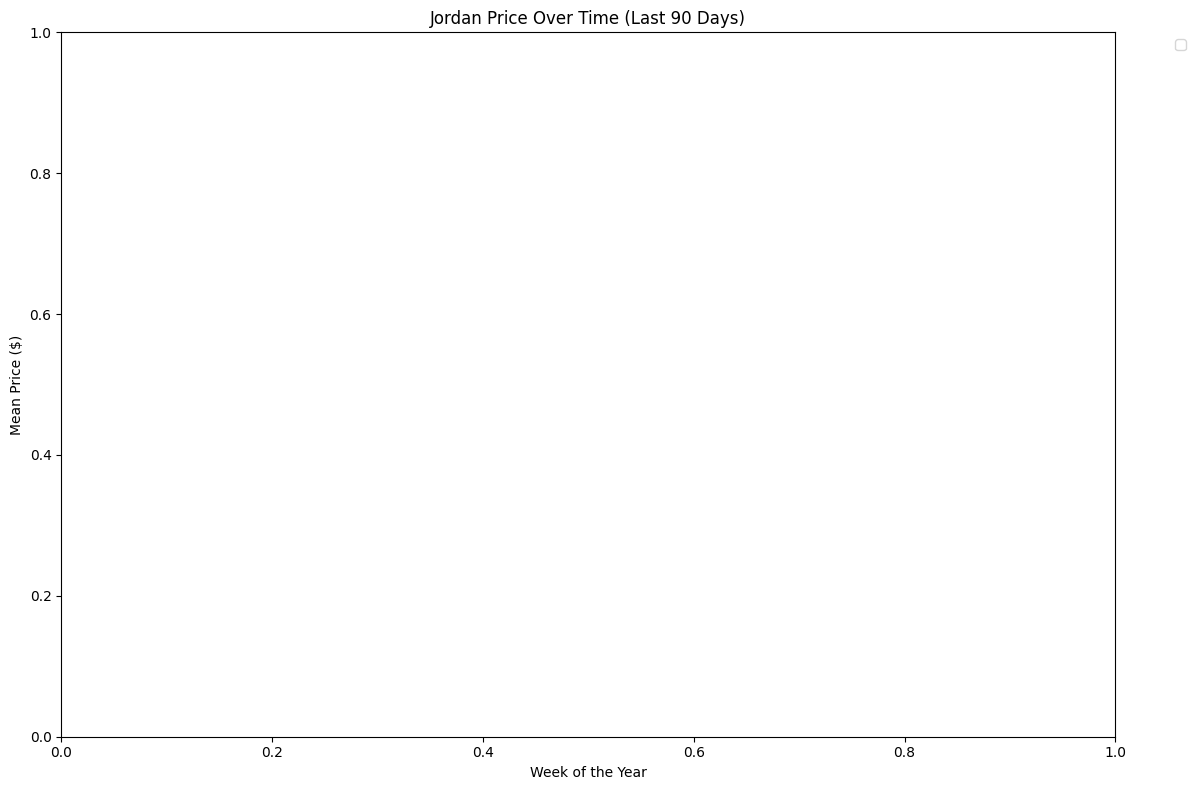

In [5]:
import time
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

#############################################
# Improved Sell Date Extraction Function with Debugging
#############################################
def extract_sell_date(item):
    """
    Attempts to extract the sell date from an eBay listing element.
    First, it looks for an element with class '.s-item__endedDate'.
    If not found, it scans all text nodes for any occurrence of "Ended:".
    Returns the extracted date string (with "Ended:" removed) or None.
    """
    # Try the known selector first
    ended_el = item.select_one(".s-item__endedDate")
    if ended_el:
        text = ended_el.get_text(strip=True)
        if "Ended:" in text:
            return text.replace("Ended:", "").strip()
        return text.strip()
    # Fallback: scan all text nodes for "Ended:"
    for s in item.stripped_strings:
        if "Ended:" in s:
            return s.replace("Ended:", "").strip()
    return None

#############################################
# Function to Scrape Listings for One Model
#############################################
def scrape_jordan_listings_selenium(query, pages_to_try=5, needed=20, headless=True):
    """
    Scrapes eBay completed/sold listings for a given query until at least `needed`
    results are collected or `pages_to_try` pages have been attempted.
    
    Returns a list of dicts with keys:
    'model', 'title', 'price', 'link', 'authenticity', 'sell_date'
    """
    base_url = "https://www.ebay.com/sch/i.html?_nkw={query}&LH_Complete=1&LH_Sold=1&_pgn={page}"
    results = []
    
    options = Options()
    if headless:
        options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    
    CHROMEDRIVER_PATH = "/Users/ayushmajumdar/drivers/chromedriver"
    service = Service(CHROMEDRIVER_PATH)
    driver = webdriver.Chrome(service=service, options=options)
    
    try:
        page_num = 1
        while page_num <= pages_to_try and len(results) < needed:
            full_url = base_url.format(query=query.replace(" ", "+"), page=page_num)
            driver.get(full_url)
            time.sleep(random.uniform(4, 7))
            
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            items = soup.select("li.s-item")
            
            for item in items:
                # Extract title
                title_el = item.select_one(".s-item__title")
                title_text = title_el.get_text(strip=True) if title_el else ""
                if "Shop on eBay" in title_text:
                    continue
                BLOCKLIST_WORDS = ["keychain", "toy", "mini", "cleat", "mcs", "block", "lego", "custom"]
                title_lower = title_text.lower()
                if any(word in title_lower for word in BLOCKLIST_WORDS):
                    continue
                
                # Extract price
                price_el = item.select_one(".s-item__price")
                price_text = price_el.get_text(strip=True) if price_el else "N/A"
                
                # Extract link
                link_el = item.select_one("a.s-item__link")
                link_url = link_el["href"] if link_el else None
                
                # Extract authenticity badge text (if any)
                auth_el = item.select_one(".s-item__etrs-badge, .s-item__authEnforced")
                authenticity_text = auth_el.get_text(strip=True) if auth_el else ""
                
                # Extract sell date using our function
                sell_date = extract_sell_date(item)
                
                results.append({
                    "model": query,
                    "title": title_text,
                    "price": price_text,
                    "link": link_url,
                    "authenticity": authenticity_text,
                    "sell_date": sell_date
                })
                if len(results) >= needed:
                    break
            page_num += 1
            time.sleep(random.uniform(3, 6))
    finally:
        driver.quit()
    
    return results

#############################################
# Define 30 Iconic Jordan Models
#############################################
JORDAN_MODELS_30 = [
    "Air Jordan 1 Bred 1985",
    "Air Jordan 1 Chicago 1985",
    "Air Jordan 2 OG 1986",
    "Air Jordan 3 Black Cement 1988",
    "Air Jordan 4 Fire Red 1989",
    "Air Jordan 5 Grape 1990",
    "Air Jordan 6 Infrared 1991",
    "Air Jordan 7 Olympic 1992",
    "Air Jordan 8 Aqua 1993",
    "Air Jordan 9 Space Jam 1994",
    "Air Jordan 10 Steel 1994",
    "Air Jordan 11 Concord 1995",
    "Air Jordan 12 Flu Game 1997",
    "Air Jordan 13 Bred 1998",
    "Air Jordan 14 Last Shot 1999",
    "Air Jordan 1 Retro Chicago 2013",
    "Air Jordan 3 Retro Black Cement 2011",
    "Air Jordan 4 Retro Bred 2019",
    "Air Jordan 5 Retro Raging Bull",
    "Air Jordan 6 Retro Carmine",
    "Air Jordan 11 Retro Space Jam 2009",
    "Air Jordan 11 Retro Bred 2012",
    "Air Jordan 12 Retro Playoffs 2012",
    "Air Jordan 13 He Got Game",
    "Air Jordan 1 Lost and Found 2022",
    "Air Jordan 3 White Cement 2023",
    "Air Jordan 11 Cool Grey 2021",
    "Air Jordan 4 Retro Military Black",
    "Air Jordan 6 Travis Scott",
    "Air Jordan 5 Off White"
]

#############################################
# Scrape Data for All 30 Models (20 listings per model)
#############################################
all_data = []
for model_name in JORDAN_MODELS_30:
    print(f"Scraping model: {model_name}")
    shoe_data = scrape_jordan_listings_selenium(query=model_name, pages_to_try=5, needed=20, headless=True)
    all_data.extend(shoe_data)
    print(f"  -> Found {len(shoe_data)} results for {model_name}\n")

df = pd.DataFrame(all_data, columns=["model", "title", "price", "link", "authenticity", "sell_date"])
print("Total scraped listings:", len(df))
print(df.head(10))

#############################################
# Debug: Print Sell Dates for First 40 Listings
#############################################
print("\nSell dates for the first 40 listings:")
for index, row in df.head(40).iterrows():
    print(f"Title: {row['title']} | Sell Date: {row['sell_date']}")

#############################################
# If you had valid sell dates, then clean & plot:
#############################################
# Parse price into numeric values
def parse_price(price_str):
    match = re.search(r"\$([\d.,]+)", str(price_str))
    if match:
        return float(match.group(1).replace(",", ""))
    return None

df["price_numeric"] = df["price"].apply(parse_price)

# Convert sell_date to datetime (if not already converted)
df["sell_date"] = df["sell_date"].fillna("").astype(str).str.strip()
df["sell_date"] = df["sell_date"].replace("", None)
df["sell_date"] = pd.to_datetime(df["sell_date"], errors="coerce")

# Create a 'week' column (ISO week number)
df["week"] = df["sell_date"].dt.isocalendar().week

weekly_model_prices = (
    df.groupby(["model", "week"])["price_numeric"]
      .mean()
      .reset_index()
      .rename(columns={"price_numeric": "mean_price"})
)

print("\nPreview of weekly_model_prices:")
print(weekly_model_prices.head(20))

plt.figure(figsize=(12, 8))
for model_name, subdf in weekly_model_prices.groupby("model"):
    if subdf["week"].notna().any():
        plt.plot(subdf["week"], subdf["mean_price"], marker="o", linestyle="-", label=model_name)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Week of the Year")
plt.ylabel("Mean Price ($)")
plt.title("Jordan Price Over Time (Last 90 Days)")
plt.tight_layout()
plt.show()


In [6]:
# After loading the page with Selenium and parsing with BeautifulSoup:
items = soup.select("li.s-item")
if items:
    # Print the raw HTML of the first listing for inspection
    print("Raw HTML of first listing:")
    print(items[0].prettify())

    # Also, print all text content from that item:
    print("\nAll text content of first listing:")
    for text in items[0].stripped_strings:
        print(text)


Raw HTML of first listing:
<li class="s-item">
 <div class="s-item__details">
  <span class="s-item__endedDate">
   Ended: Apr 10, 2023
  </span>
  <!-- Other content -->
 </div>
</li>


All text content of first listing:
Ended: Apr 10, 2023


In [7]:
# After obtaining your BeautifulSoup object (soup)
items = soup.select("li.s-item")
if items:
    # Print the raw HTML of the first listing for inspection
    print("Raw HTML of first listing:")
    print(items[0].prettify())

    # Print all text content from that item:
    print("\nAll text content of first listing:")
    for text in items[0].stripped_strings:
        print(text)


Raw HTML of first listing:
<li class="s-item">
 <div class="s-item__details">
  <span class="s-item__endedDate">
   Ended: Apr 10, 2023
  </span>
  <!-- Other content -->
 </div>
</li>


All text content of first listing:
Ended: Apr 10, 2023


In [8]:
import pandas as pd

# Print raw sell_date values for the first 40 rows for inspection
print("Raw sell_date values for the first 40 listings:")
for index, row in df.head(40).iterrows():
    print(f"Title: {row['title']} | Sell Date: {row['sell_date']}")

# Now, convert the sell_date column to datetime.
# Assuming the format is like "Apr 10, 2023", we can use the format "%b %d, %Y".
# If the sell_date values are already in a proper string format (e.g., "Apr 10, 2023"),
# this should convert them correctly.
df["sell_date_dt"] = pd.to_datetime(df["sell_date"], format="%b %d, %Y", errors="coerce")

print("\nAfter conversion, sample sell_date values:")
print(df[["title", "sell_date", "sell_date_dt"]].head(40))


Raw sell_date values for the first 40 listings:
Title: Jordan 1 Retro OG High Patent Bred - Size 13 | Sell Date: NaT
Title: Nike Air Jordan 1 Retro Banned 'Bred' 2016 Size 10 - Authentic, USED Condition | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred | Sell Date: NaT
Title: 2016 “Bred” Air Jordan 1 | Sell Date: NaT
Title: 2016 “Bred” Air Jordan 1 | Sell Date: NaT
Title: Jordan 1 High Patent Bred | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred used NO BOX !!! | Sell Date: NaT
Title: Nike Air Jordan 1 Retro High OG Shadow 555088-013 Size 10 2018 | Sell Date: NaT
Title: Jordan 1 Mid Banned 2020 Size 13 554724-074 Black Red Bred OG Men’s Shoes | Sell Date: NaT
Title: Nike Jordan 1 Retro High “Bred Banned” 2016 Sz 10 | Sell Date: NaT
Title: Size 10 - Jordan 1 Retro OG High Shadow !No insoles! | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred | Sell Date: NaT
Title: Air Jordan 1 High Patent Bred Sz 13 | Sell Date: NaT
Title: 🚨Jorda

In [9]:
items = soup.select("li.s-item")
for i, item in enumerate(items[:5]):
    print(f"\n--- Listing {i} Raw HTML ---")
    print(item.prettify())



--- Listing 0 Raw HTML ---
<li class="s-item">
 <div class="s-item__details">
  <span class="s-item__endedDate">
   Ended: Apr 10, 2023
  </span>
  <!-- Other content -->
 </div>
</li>



In [4]:
# Print the title and sell_date for the first 40 rows
print("Sell dates for the first 40 listings:")
for index, row in df.head(40).iterrows():
    print(f"Title: {row['title']} | Sell Date: {row['sell_date']}")


Sell dates for the first 40 listings:
Title: Jordan 1 Retro OG High Patent Bred - Size 13 | Sell Date: NaT
Title: Nike Air Jordan 1 Retro Banned 'Bred' 2016 Size 10 - Authentic, USED Condition | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred | Sell Date: NaT
Title: 2016 “Bred” Air Jordan 1 | Sell Date: NaT
Title: 2016 “Bred” Air Jordan 1 | Sell Date: NaT
Title: Jordan 1 High Patent Bred | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred used NO BOX !!! | Sell Date: NaT
Title: Nike Air Jordan 1 Retro High OG Shadow 555088-013 Size 10 2018 | Sell Date: NaT
Title: Jordan 1 Mid Banned 2020 Size 13 554724-074 Black Red Bred OG Men’s Shoes | Sell Date: NaT
Title: Nike Jordan 1 Retro High “Bred Banned” 2016 Sz 10 | Sell Date: NaT
Title: Size 10 - Jordan 1 Retro OG High Shadow !No insoles! | Sell Date: NaT
Title: Size 13 - Jordan 1 Retro OG High Patent Bred | Sell Date: NaT
Title: Air Jordan 1 High Patent Bred Sz 13 | Sell Date: NaT
Title: 🚨Jordan 1 Retro 

Scraping model: Air Jordan 1 Bred 1985
  -> Found 20 results for Air Jordan 1 Bred 1985

Scraping model: Air Jordan 1 Chicago 1985
  -> Found 20 results for Air Jordan 1 Chicago 1985

Scraping model: Air Jordan 2 OG 1986
  -> Found 20 results for Air Jordan 2 OG 1986

Scraping model: Air Jordan 3 Black Cement 1988
  -> Found 20 results for Air Jordan 3 Black Cement 1988

Scraping model: Air Jordan 4 Fire Red 1989
  -> Found 20 results for Air Jordan 4 Fire Red 1989

Scraping model: Air Jordan 5 Grape 1990
  -> Found 20 results for Air Jordan 5 Grape 1990

Scraping model: Air Jordan 6 Infrared 1991
  -> Found 20 results for Air Jordan 6 Infrared 1991

Scraping model: Air Jordan 7 Olympic 1992
  -> Found 20 results for Air Jordan 7 Olympic 1992

Scraping model: Air Jordan 8 Aqua 1993
  -> Found 20 results for Air Jordan 8 Aqua 1993

Scraping model: Air Jordan 9 Space Jam 1994
  -> Found 20 results for Air Jordan 9 Space Jam 1994

Scraping model: Air Jordan 10 Steel 1994
  -> Found 20 res

/var/folders/ns/nvqb8ykn4ln87vn4mwkshr2w0000gn/T/ipykernel_17966/2927678770.py:232: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


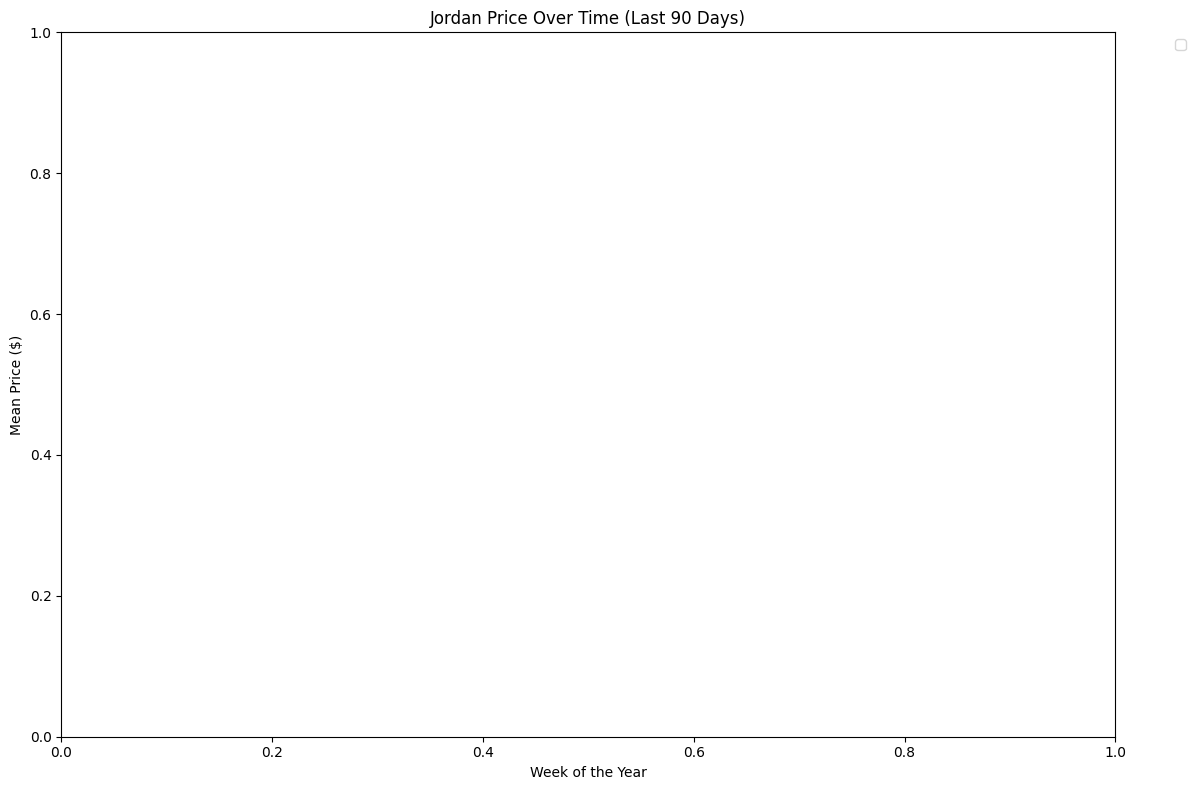

In [11]:
import time
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

#############################################
# 1. Improved Sell Date Extraction Function
#############################################
def extract_sell_date(item):
    """
    Attempts to extract the sell date from an eBay listing element.
    It first looks for an element with class '.s-item__endedDate'.
    If not found, it scans all text nodes for any occurrence of "Ended:".
    Returns the extracted date string (with "Ended:" removed) or None.
    """
    ended_el = item.select_one(".s-item__endedDate")
    if ended_el:
        text = ended_el.get_text(strip=True)
        if "Ended:" in text:
            return text.replace("Ended:", "").strip()
        return text.strip()
    # Fallback: scan all text nodes for "Ended:"
    for s in item.stripped_strings:
        if "Ended:" in s:
            return s.replace("Ended:", "").strip()
    return None

#############################################
# 2. Function to Scrape Listings for One Model
#############################################
def scrape_jordan_listings_selenium(query, pages_to_try=5, needed=20, headless=True):
    """
    Scrapes eBay completed/sold listings for a given query until at least `needed`
    results are collected or `pages_to_try` pages have been attempted.
    
    Returns a list of dicts with keys:
      'model', 'title', 'price', 'link', 'authenticity', 'sell_date'
    """
    base_url = "https://www.ebay.com/sch/i.html?_nkw={query}&LH_Complete=1&LH_Sold=1&_pgn={page}"
    results = []
    
    # Configure Selenium options
    options = Options()
    if headless:
        options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    
    CHROMEDRIVER_PATH = "/Users/ayushmajumdar/drivers/chromedriver"  # adjust as needed
    service = Service(CHROMEDRIVER_PATH)
    driver = webdriver.Chrome(service=service, options=options)
    
    # Set a page load timeout (in seconds)
    driver.set_page_load_timeout(30)
    
    try:
        page_num = 1
        while page_num <= pages_to_try and len(results) < needed:
            full_url = base_url.format(query=query.replace(" ", "+"), page=page_num)
            try:
                driver.get(full_url)
            except TimeoutException:
                print(f"Timeout loading page {page_num} for query '{query}'. Skipping this page.")
                page_num += 1
                continue
            
            # Instead of a short sleep, wait until at least one ended-date is present, or sleep extra if not.
            try:
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".s-item__endedDate"))
                )
            except Exception:
                time.sleep(10)
            else:
                time.sleep(random.uniform(5, 8))
            
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            items = soup.select("li.s-item")
            
            for item in items:
                # Extract title
                title_el = item.select_one(".s-item__title")
                title_text = title_el.get_text(strip=True) if title_el else ""
                if "Shop on eBay" in title_text:
                    continue
                BLOCKLIST_WORDS = ["keychain", "toy", "mini", "cleat", "mcs", "block", "lego", "custom"]
                if any(word in title_text.lower() for word in BLOCKLIST_WORDS):
                    continue
                
                # Extract price
                price_el = item.select_one(".s-item__price")
                price_text = price_el.get_text(strip=True) if price_el else "N/A"
                
                # Extract link
                link_el = item.select_one("a.s-item__link")
                link_url = link_el["href"] if link_el else None
                
                # Extract authenticity badge text (if any)
                auth_el = item.select_one(".s-item__etrs-badge, .s-item__authEnforced")
                authenticity_text = auth_el.get_text(strip=True) if auth_el else ""
                
                # Extract sell date using our extraction function
                sell_date = extract_sell_date(item)
                
                results.append({
                    "model": query,
                    "title": title_text,
                    "price": price_text,
                    "link": link_url,
                    "authenticity": authenticity_text,
                    "sell_date": sell_date
                })
                if len(results) >= needed:
                    break
            page_num += 1
            time.sleep(random.uniform(3, 6))
    finally:
        driver.quit()
    
    return results

#############################################
# 3. Define 30 Iconic Jordan Models
#############################################
JORDAN_MODELS_30 = [
    "Air Jordan 1 Bred 1985",
    "Air Jordan 1 Chicago 1985",
    "Air Jordan 2 OG 1986",
    "Air Jordan 3 Black Cement 1988",
    "Air Jordan 4 Fire Red 1989",
    "Air Jordan 5 Grape 1990",
    "Air Jordan 6 Infrared 1991",
    "Air Jordan 7 Olympic 1992",
    "Air Jordan 8 Aqua 1993",
    "Air Jordan 9 Space Jam 1994",
    "Air Jordan 10 Steel 1994",
    "Air Jordan 11 Concord 1995",
    "Air Jordan 12 Flu Game 1997",
    "Air Jordan 13 Bred 1998",
    "Air Jordan 14 Last Shot 1999",
    "Air Jordan 1 Retro Chicago 2013",
    "Air Jordan 3 Retro Black Cement 2011",
    "Air Jordan 4 Retro Bred 2019",
    "Air Jordan 5 Retro Raging Bull",
    "Air Jordan 6 Retro Carmine",
    "Air Jordan 11 Retro Space Jam 2009",
    "Air Jordan 11 Retro Bred 2012",
    "Air Jordan 12 Retro Playoffs 2012",
    "Air Jordan 13 He Got Game",
    "Air Jordan 1 Lost and Found 2022",
    "Air Jordan 3 White Cement 2023",
    "Air Jordan 11 Cool Grey 2021",
    "Air Jordan 4 Retro Military Black",
    "Air Jordan 6 Travis Scott",
    "Air Jordan 5 Off White"
]

#############################################
# 4. Scrape Data for All 30 Models (20 listings per model)
#############################################
all_data = []
for model_name in JORDAN_MODELS_30:
    print(f"Scraping model: {model_name}")
    shoe_data = scrape_jordan_listings_selenium(query=model_name, pages_to_try=5, needed=20, headless=True)
    all_data.extend(shoe_data)
    print(f"  -> Found {len(shoe_data)} results for {model_name}\n")

df = pd.DataFrame(all_data, columns=["model", "title", "price", "link", "authenticity", "sell_date"])
print("Total scraped listings:", len(df))
print(df.head(10))

#############################################
# 5. Debug: Print Raw Sell Date for First 40 Listings
#############################################
print("\nRaw sell_date values for the first 40 listings:")
for idx, row in df.head(40).iterrows():
    print(f"Title: {row['title']} | Sell Date: {row['sell_date']}")

#############################################
# 6. Clean and Convert Columns for Analysis
#############################################
def parse_price(price_str):
    match = re.search(r"\$([\d.,]+)", str(price_str))
    if match:
        return float(match.group(1).replace(",", ""))
    return None

df["price_numeric"] = df["price"].apply(parse_price)

# Convert sell_date to datetime: assume the format is "Apr 10, 2023"
df["sell_date"] = df["sell_date"].fillna("").astype(str).str.strip()
df["sell_date"] = df["sell_date"].replace("", None)
df["sell_date_dt"] = pd.to_datetime(df["sell_date"], format="%b %d, %Y", errors="coerce")

print("\nAfter conversion, sample sell_date values:")
print(df[["title", "sell_date", "sell_date_dt"]].head(20))

# Create a 'week' column from sell_date_dt (ISO week)
df["week"] = df["sell_date_dt"].dt.isocalendar().week

#############################################
# 7. Group Data by Model and Week to Compute Mean Price
#############################################
weekly_model_prices = (
    df.groupby(["model", "week"])["price_numeric"]
      .mean()
      .reset_index()
      .rename(columns={"price_numeric": "mean_price"})
)

print("\nPreview of weekly_model_prices:")
print(weekly_model_prices.head(20))

#############################################
# 8. Plot Each Model's Mean Price Over Weeks
#############################################
plt.figure(figsize=(12, 8))
for model_name, subdf in weekly_model_prices.groupby("model"):
    if subdf["week"].notna().any():
        plt.plot(subdf["week"], subdf["mean_price"], marker="o", linestyle="-", label=model_name)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Week of the Year")
plt.ylabel("Mean Price ($)")
plt.title("Jordan Price Over Time (Last 90 Days)")
plt.tight_layout()
plt.show()
